In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.backend_bases import register_backend
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib.figure import Figure


# Make the interactive backend as PDF
register_backend("pdf", FigureCanvasPgf)

plt.style.use("cdb.mplstyle")
TEXTWIDTH = 6.30045  # in inches
PAGEWIDTH = 6.30045 + 1.17638 + 0.1384  # in inches


def newfig(
    format: float = 1.618 / 1,  # Golden ratio, can be 4/3, 16/9, etc.
    width: float = 1,  # % of \textwidth
    height: float | None = None,
    base_width: float = TEXTWIDTH,  # in inches
    base_height: float = TEXTWIDTH / 1.618,
    **kwargs,
) -> Figure:
    """Create a new figure with the appropriate size."""
    figwidth = base_width * width

    if height is not None:
        figheight = base_height * height
    else:
        figheight = figwidth / format

    # set constrained_layout to True by default
    kwargs["layout"] = kwargs.get("layout", "constrained")

    return plt.figure(figsize=(figwidth, figheight), **kwargs)


SAVEDIR = (
    # "/Users/leo/Workspace/phdcybersec/thesis/src/content/chapters/03_sota/figures/"
    "."
)

In [5]:
df_cicids = pd.read_csv("../data/nfv2/sampled/cicids.csv.gz")
df_botiot = pd.read_csv("../data/nfv2/sampled/botiot.csv.gz")
df_nb15 = pd.read_csv("../data/nfv2/sampled/nb15.csv.gz")
df_toniot = pd.read_csv("../data/nfv2/sampled/toniot.csv.gz")

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

def prepare(df) -> pd.DataFrame:
    RM_COLS = [
        "IPV4_SRC_ADDR",
        "L4_SRC_PORT",
        "IPV4_DST_ADDR",
        "L4_DST_PORT",
        "Label",
        "Attack",
    ]

    if "Dataset" in df.columns:
        RM_COLS += ["Dataset"]

    # select the columns to compose the Dataset object
    X = df.drop(columns=RM_COLS)

    # convert classes to numerical values
    X = pd.get_dummies(X)

    # normalize the data
    scaler = MinMaxScaler()
    scaler.fit(X)
    X[X.columns] = scaler.transform(X)

    return X

In [10]:


X_cicids = prepare(df_cicids)
X_botiot = prepare(df_botiot)
X_nb15 = prepare(df_nb15)
X_toniot = prepare(df_toniot)
Y_cicids = df_cicids["Label"]
Y_botiot = df_botiot["Label"]
Y_nb15 = df_nb15["Label"]
Y_toniot = df_toniot["Label"]

X = pd.concat([X_cicids, X_botiot, X_nb15, X_toniot])
Y = pd.concat([Y_cicids, Y_botiot, Y_nb15, Y_toniot])

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
origin = pd.Series(["CICIDS"] * len(X_cicids) + ["BOT-IoT"] * len(X_botiot) + ["NB15"] * len(X_nb15) + ["ToN-IoT"] * len(X_toniot), name="Origin")
df_pca = pd.concat([df_pca, origin], axis=1)



/var/folders/6v/8wy9dm6938n6yt0_hkf53crr0000gn/T/ipykernel_20723/3716478587.py:24: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgd.legendHandles:
/nix/store/lgxiw09hh1xqxxf83bq2zlkv4dsnhfqk-python3-3.11.3-env/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


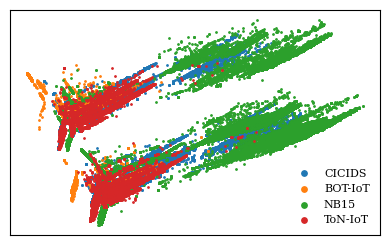

In [35]:
from matplotlib.ticker import NullLocator


fig = newfig(width=0.6)
ax = fig.add_subplot(111)

colors = {
    "CICIDS": "tab:blue",
    "BOT-IoT": "tab:orange",
    "NB15": "tab:green",
    "ToN-IoT": "tab:red",
}

for origin, color in colors.items():
    df_origin = df_pca[df_pca["Origin"] == origin]
    ax.scatter(df_origin["PC1"], df_origin["PC2"], label=origin, color=color,s=1)

# ax.set_xlabel("Principal Component 1")
# ax.set_ylabel("Principal Component 2")
ax.xaxis.set_major_locator(NullLocator())
ax.yaxis.set_major_locator(NullLocator())
# lgd = ax.legend(ncol=4, loc="upper center", bbox_to_anchor=(0.5, 1.18))
lgd = ax.legend()
for handle in lgd.legendHandles:
    handle.set_sizes([15]) # type: ignore

In [21]:
import numpy as np

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Get the components of the PCA
components = pca.components_

# Iterate over each component
for i, component in enumerate(components):
    # Get the indices of the top 3 features with highest absolute values
    top_3_indices = np.argsort(np.abs(component))[-3:]
    
    # Get the corresponding feature names
    top_3_features = X.columns[top_3_indices]
    
    # Print the component number and the top 3 features
    print(f"Component {i+1}: {top_3_features}")


Component 1: Index(['SERVER_TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'TCP_FLAGS'], dtype='object')
Component 2: Index(['L7_PROTO', 'PROTOCOL', 'FLOW_DURATION_MILLISECONDS'], dtype='object')
